In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000, random_state=42)

In [3]:
import time
from sklearn.ensemble import RandomForestClassifier

t1 = time.time()
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
t0 = time.time()
print('Training took {:.2f}s'.format(t0-t1))

Training took 14.04s


In [4]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9674

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_train_reduced = pca.fit_transform(X_train)

In [6]:
t1 = time.time()
rfc.fit(X_train_reduced,y_train)
t0 = time.time()
print('Training took {:.2f}s'.format(t0-t1))

Training took 22.99s


In [7]:
X_test_reduced = pca.transform(X_test)
y_pred = rfc.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9469

PCA sucked for this model, it increased training time and severely crippled performance

### Exercise 10

In [8]:
import numpy as np

np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = X[idx]
y = y[idx]
y = y.reshape(len(y),1)

In [9]:
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding
import matplotlib.pyplot as plt
import matplotlib as mpl

pca2 = PCA(n_components=2, random_state=42)
tsne = TSNE(n_jobs=-1, random_state=42)
mds = MDS(n_jobs=-1, random_state=42)
lle = LocallyLinearEmbedding(n_jobs=-1, random_state=42)

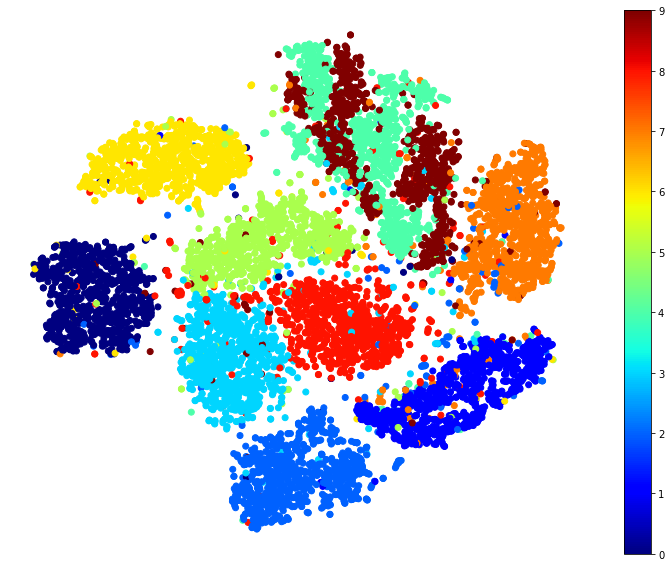

TSNE(n_jobs=-1, random_state=42) : Training took 71.93907737731934s


In [16]:
t0=time.time()
X_reduced_tsne = tsne.fit_transform(X)
t1=time.time()

plt.figure(figsize=(13,10))
plt.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=y,cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

print(tsne,': Training took {:.2f}s'.format(t1-t0))

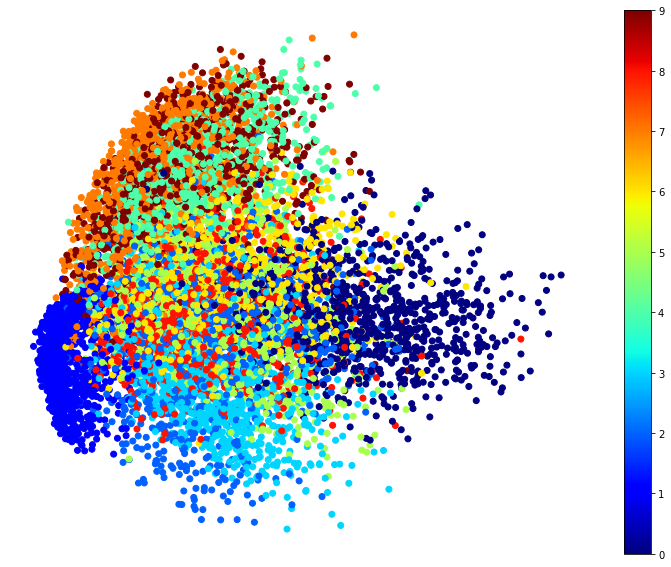

PCA(n_components=2, random_state=42) : Training took 0.64s


In [18]:
t0=time.time()
X_reduced_pca = pca.fit_transform(X)
t1=time.time()

plt.figure(figsize=(13,10))
plt.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=y,cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

print(pca2,': Training took {:.2f}s'.format(t1-t0))

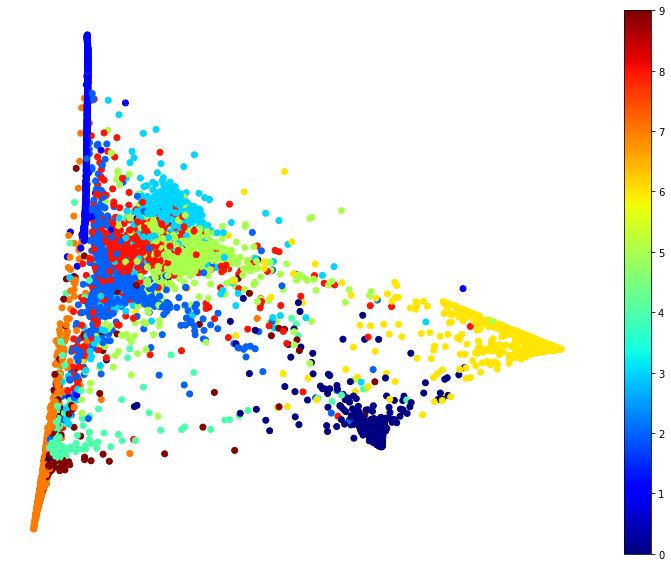

LocallyLinearEmbedding(n_jobs=-1, random_state=42) : Training took 41.84s


In [19]:
t0=time.time()
X_reduced_lle = lle.fit_transform(X)
t1=time.time()

plt.figure(figsize=(13,10))
plt.scatter(X_reduced_lle[:,0],X_reduced_lle[:,1],c=y,cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

print(lle,': Training took {:.2f}s'.format(t1-t0))

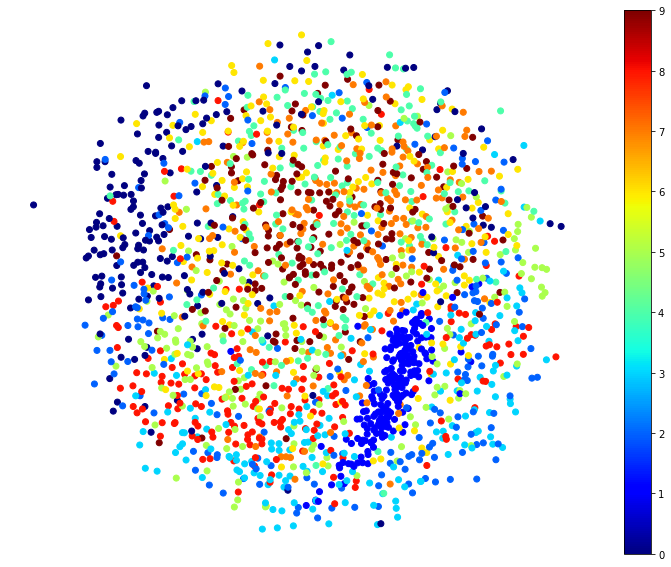

MDS(n_jobs=-1, random_state=42) : Training took 76.87s


In [20]:
t0=time.time()
X_reduced_mds = mds.fit_transform(X[:2000])
t1=time.time()

plt.figure(figsize=(13,10))
plt.scatter(X_reduced_mds[:,0],X_reduced_mds[:,1],c=y[:2000],cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

print(mds,': Training took {:.2f}s'.format(t1-t0))

t-SNE gave the best results, let's see if we can speed it up with PCA to 0.95 variance

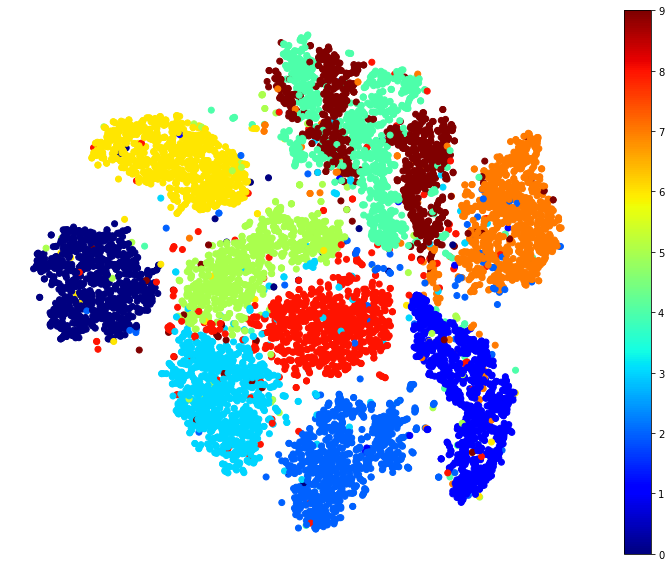

Pipeline training took 51.35s


In [17]:
from sklearn.pipeline import Pipeline

red_pipe = Pipeline([
    ('pca',PCA(n_components=0.95, random_state=42)),
    ('tsne', TSNE(n_components=2, random_state=42,n_jobs=-1))
])

t0 = time.time()
X_reduced_pipe = red_pipe.fit_transform(X)
t1 = time.time()

plt.figure(figsize=(13,10))
plt.scatter(X_reduced_pipe[:,0],X_reduced_pipe[:,1],c=y,cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

print('Pipeline training took {:.2f}s'.format(t1-t0))

PCA reduction managed to speed up training considerably, while not damaging the results.